<a href="https://colab.research.google.com/github/omarkhaled99/skin_lesion_segmentation/blob/main/skin_lesion_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

In [ ]:
!nvidia-smi

Sat Jan 22 13:46:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Downloading data and data preparation

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%mkdir isic

In [ ]:
%cd isic


In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part1_GroundTruth.zip

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip

In [ ]:
!cd isic

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data.zip

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Training_Data.zip

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Validation_Data.zip

In [ ]:
!rm /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data.zip
!rm /content/drive/MyDrive/isic/ISIC-2017_Training_Data.zip
!rm /content/drive/MyDrive/isic/ISIC-2017_Validation_Data.zip

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Part1_GroundTruth.zip

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Training_Part1_GroundTruth.zip

In [ ]:
!unzip /content/drive/MyDrive/isic/ISIC-2017_Validation_Part1_GroundTruth.zip

In [ ]:
!rm /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Part1_GroundTruth.zip
!rm /content/drive/MyDrive/isic/ISIC-2017_Training_Part1_GroundTruth.zip
!rm /content/drive/MyDrive/isic/ISIC-2017_Validation_Part1_GroundTruth.zip

In [ ]:
!pwd

In [ ]:
!find . -type f -iname \*.png -delete

In [ ]:
ls /content/drive/MyDrive/isic/ISIC-2017_Training_Data | wc -l

In [ ]:
!ls /content/drive/MyDrive/isic/ISIC-2017_Validation_Data | wc -l

In [ ]:
!ls /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data | wc -l

In [ ]:
%cd /content/drive/MyDrive/isic
!du -sh .

In [ ]:
%cd /content/

In [ ]:
!wget https://www.imagemagick.org/download/ImageMagick.tar.gz

In [ ]:
!tar xvzf ImageMagick.tar.gz
%cd /content/ImageMagick-7.1.0-19

In [ ]:
!ls

In [ ]:
!bash ./configure 

In [ ]:
!make

In [ ]:
!sudo make install 
!sudo ldconfig /usr/local/lib
!magick -version

In [ ]:
%cd /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data

/content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data


In [ ]:
!magick mogrify -resize 512x512 *.jpg

In [ ]:
%cd /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data

/content/drive/MyDrive/isic/ISIC-2017_Test_v2_Data


In [ ]:

!for i in *.jpg\
do\
convert $i -resize 512x512 $(basename $i .jpg)-scaled.jpg\
done

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
%cd /content/drive/MyDrive/isic/ISIC-2017_Test_v2_Part1_GroundTruth
!magick mogrify -resize 512x512 *.png

In [ ]:
%cd /content/

/content


In [ ]:
!touch resize_script.sh

In [ ]:
!bash resize_script.sh

In [ ]:
%cd /content/drive/MyDrive/isic/ISIC-2017_Validation_Part1_GroundTruth

/content/drive/MyDrive/isic/ISIC-2017_Validation_Part1_GroundTruth


In [ ]:
!mkdir -p resized && mv "resize_"* resized

In [ ]:
!du -sh /content/drive/MyDrive/isic/isic-512

251M	/content/drive/MyDrive/isic/isic-512


In [ ]:
!find /content/drive/MyDrive/ -name "isic-512"

/content/drive/MyDrive/isic/ISIC-2017_Training_Part1_GroundTruth/isic-512


##importing required libraries

In [ ]:
!pip install comet_ml

In [ ]:

import comet_ml
from comet_ml import Experiment
import torch

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms 
from torch.autograd import Variable
import torch.nn
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, ConvTranspose2d
from torch.optim import Adam, SGD
import torch.nn.functional as F
import cv2
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import os


##data visualization and loading

data path: /content/drive/MyDrive/isic/isic-512

**dataloader**

In [ ]:


class SegmentationDataset(Dataset):
	def __init__(self, imageDir, maskDir, transforms=None, cache =False):
		# store the image and mask filepaths, and augmentation
		# transforms
		self.cache = cache
		
		self.imagePaths = sorted(glob.glob(imageDir+"/*"))
		self.maskPaths = sorted(glob.glob(maskDir+"/*"))
		self.transforms = transforms
		if self.cache:
				self.cache_storage = [None] * self.__len__()
	def __len__(self):
		# return the number of total samples contained in t he dataset
		return len(self.imagePaths)
	def __getitem__(self, idx):
		# grab the image path from the current index
		if self.cache_storage[idx] is None:
				imagePath = self.imagePaths[idx]
				# load the image from disk, swap its channels from BGR to RGB,
				# and read the associated mask from disk in grayscale mode
				image = cv2.imread(imagePath)
				image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
				mask = cv2.imread(self.maskPaths[idx], 0)
				# check to see if we are applying any transformations
				if self.transforms is not None:
					# apply the transformations to both image and its mask
					image = self.transforms[0](image)
					mask = self.transforms[1](mask)
				# return a tuple of the image and its mask
				self.cache_storage[idx]=(image, mask)
				return (image, mask)
		else:
				return self.cache_storage[idx]


In [ ]:
p = [transforms.Compose([transforms.ToTensor() ,transforms.Resize((572,572))]),transforms.Compose([transforms.ToTensor() ,transforms.Resize((388,388))]) ]
train_dataset =  SegmentationDataset("/content/drive/MyDrive/isic/isic-512/resized_train","/content/drive/MyDrive/isic/isic-512/resized_train_gt",transforms  =p ,cache =True)
test_dataset =  SegmentationDataset("/content/drive/MyDrive/isic/isic-512/resized_test","/content/drive/MyDrive/isic/isic-512/resized_test_gt",transforms =p,cache =True)
valid_dataset = SegmentationDataset("/content/drive/MyDrive/isic/isic-512/resized_valid","/content/drive/MyDrive/isic/isic-512/resized_valid_gt",transforms =p,cache =True)

**visualizaing samples of the data**

In [ ]:
datasets = [train_dataset,test_dataset,valid_dataset]
dataset_labels = ["train", "test", "valid"]


images

train dataset


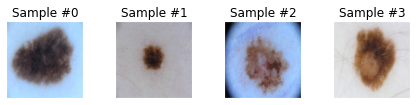

test dataset


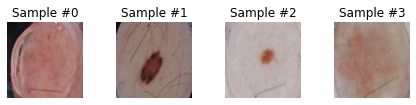

valid dataset


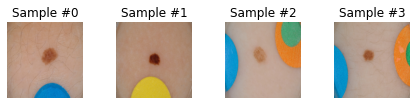


Their ground truth

train dataset


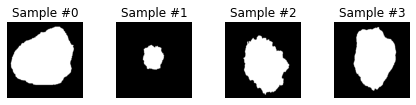

test dataset


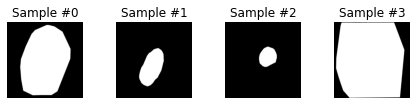

valid dataset


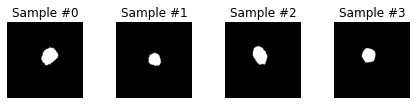

In [ ]:
print("images\n")

for k,dataset in enumerate(datasets):
  print(dataset_labels[k]+" dataset")
  fig = plt.figure()
  for i in range(len(dataset)):
      sample = dataset[i]
      ax = plt.subplot(1, 4, i + 1)
      plt.tight_layout()
      ax.set_title('Sample #{}'.format(i))
      ax.axis('off')
      plt.imshow(sample[0].permute(1, 2, 0))
      if i == 3:
          plt.show()
          break

print("\nTheir ground truth\n")

for k,dataset in enumerate(datasets):
  print(dataset_labels[k]+" dataset")
  fig = plt.figure()
  for i in range(len(dataset)):
      sample = dataset[i]
      ax = plt.subplot(1, 4, i + 1)
      plt.tight_layout()
      ax.set_title('Sample #{}'.format(i))
      ax.axis('off')
      plt.imshow(sample[1][0],cmap = "gray")
      if i == 3:
          plt.show()
          break


**creating data loaders**

In [ ]:
batch_size = 8

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False,pin_memory=True)

In [ ]:
!nvidia-smi

Sun Jan 23 01:15:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


##defining the network

In [ ]:
class Unet(Module):
  def __init__(self):
    super(Unet, self).__init__()
    self.conv1 = Conv2d(3, 64, kernel_size=3, stride=1)
    self.conv2 = Conv2d(64, 64, kernel_size=3, stride=1)
    self.bnorm64 = BatchNorm2d(64)


    self.conv3 = Conv2d(64, 128, kernel_size=3, stride=1)
    self.conv4 = Conv2d(128, 128, kernel_size=3, stride=1)
    self.bnorm128 = BatchNorm2d(128)

    self.conv5 = Conv2d(128, 256, kernel_size=3, stride=1)
    self.conv6 = Conv2d(256, 256, kernel_size=3, stride=1)
    self.bnorm256 = BatchNorm2d(256)

    self.conv7 = Conv2d(256, 512, kernel_size=3, stride=1)
    self.conv8 = Conv2d(512, 512, kernel_size=3, stride=1)
    self.bnorm512 = BatchNorm2d(512)

    # self.conv7 = Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
    # self.conv8 = Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
    # self.bnorm512 = BatchNorm2d(512)

    self.conv9 = Conv2d(512, 1024, kernel_size=3, stride=1)
    self.conv10 = Conv2d(1024, 1024, kernel_size=3, stride=1)
    self.bnorm1024 = BatchNorm2d(1024)

    self.upconv1 = ConvTranspose2d(1024, 512,kernel_size=2, stride=2)
    self.conv11 = Conv2d(1024, 512, kernel_size=3, stride=1) 

    self.upconv2 = ConvTranspose2d(512, 256,kernel_size=2, stride=2)
    self.conv12 = Conv2d(512, 256, kernel_size=3, stride=1) 

    self.upconv3 = ConvTranspose2d(256, 128,kernel_size=2, stride=2)
    self.conv13 = Conv2d(256,128, kernel_size=3, stride=1) 

    self.upconv4 = ConvTranspose2d(128, 64,kernel_size=2, stride=2)
    self.conv14 = Conv2d(128,64, kernel_size=3, stride=1) 

    self.conv15 = Conv2d(64,1, kernel_size=1, stride=1)

    self.maxpool = MaxPool2d(kernel_size=2, stride=2)
    self.relu = ReLU(inplace=True)

  def forward(self,x):
    ##downsampling
    x = self.conv1(x)
    # print(self.block1.shape)
    x = self.bnorm64(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.bnorm64(x)
    x = self.relu(x)
    self.block1 = x
    x = self.maxpool(x)

    x = self.conv3(x)
    x = self.bnorm128(x)
    x = self.relu(x)
    x = self.conv4(x)
    x = self.bnorm128(x)
    x = self.relu(x)
    self.block2 = x
    x = self.maxpool(x)

    
    x = self.conv5(x)
    x = self.bnorm256(x)
    x = self.relu(x)
    x = self.conv6(x)
    x = self.bnorm256(x)
    x = self.relu(x)
    self.block3 = x
    x = self.maxpool(x)

    
    x = self.conv7(x)
    # print(x.shape)
    x = self.bnorm512(x)
    x = self.relu(x)
    x = self.conv8(x)
    # print(x.shape)
    x = self.bnorm512(x)
    x = self.relu(x)
    self.block4 = x
    x = self.maxpool(x)

    
    x = self.conv9(x)
    x = self.bnorm1024(x)
    x = self.relu(x)
    x = self.conv10(x)
    x = self.bnorm1024(x)
    x = self.relu(x)
    self.block5 = x

    ##upsampling
    self.catblock1 = self.crop_and_concat(self.upconv1(self.block5),self.block4,crop=True)
    self.upblock1 = self.bnorm512(self.relu(self.conv8(self.bnorm512(self.relu(self.conv11(self.catblock1))))))
 
    self.catblock2 = self.crop_and_concat(self.upconv2(self.upblock1),self.block3,crop=True)
    self.upblock2 = self.bnorm256(self.relu(self.conv6(self.bnorm256(self.relu(self.conv12(self.catblock2))))))

    self.catblock3 = self.crop_and_concat(self.upconv3(self.upblock2),self.block2,crop=True)
    self.upblock3 = self.bnorm128(self.relu(self.conv4(self.bnorm128(self.relu(self.conv13(self.catblock3))))))

    self.catblock4 = self.crop_and_concat(self.upconv4(self.upblock3),self.block1,crop=True)
    self.upblock4 = self.bnorm64(self.relu(self.conv2(self.bnorm64(self.relu(self.conv14(self.catblock4))))))

    self.logits = self.conv15(self.upblock4)
    return self.logits
  def crop_and_concat(self, upsampled, bypass, crop=False):
    if crop:
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))
    return torch.cat((upsampled, bypass), 1)



In [ ]:
class IoULoss(Module):
    def __init__(self, weight=None, size_average=True):
        super(IoULoss, self).__init__()

    def forward(self, inputs, targets, smooth=1,threshold=0.5):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.sigmoid(inputs)       
        # thres = torch.nn.Threshold(threshold=threshold,value=0 )
        # inputs = thres(inputs)
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        threshold = torch.tensor([0.5])
        results =  torch.tensor([])
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        results,threshold = results.to(device), threshold.to(device)
        results = (inputs>threshold).float()*1
        
        # print(inputs.sum())
        #intersection is equivalent to True Positive count
        #union is the mutually inclusive area of all labels & predictions 
        intersection = (results * targets).sum()
        total = (results + targets).sum()
        union = total - intersection 
        
        IoU = (intersection + smooth)/(union + smooth)
                
        return 1 - IoU

In [ ]:
#: Loss binary mode suppose you are solving binary segmentation task.
#: That mean yor have only one class which pixels are labled as **1**,
#: the rest pixels are background and labeled as **0**.
#: Target mask shape - (N, H, W), model output mask shape (N, 1, H, W).
BINARY_MODE: str = "binary"

#: Loss multiclass mode suppose you are solving multi-**class** segmentation task.
#: That mean you have *C = 1..N* classes which have unique label values,
#: classes are mutually exclusive and all pixels are labeled with theese values.
#: Target mask shape - (N, H, W), model output mask shape (N, C, H, W).
MULTICLASS_MODE: str = "multiclass"

#: Loss multilabel mode suppose you are solving multi-**label** segmentation task.
#: That mean you have *C = 1..N* classes which pixels are labeled as **1**,
#: classes are not mutually exclusive and each class have its own *channel*,
#: pixels in each channel which are not belong to class labeled as **0**.
#: Target mask shape - (N, C, H, W), model output mask shape (N, C, H, W).
MULTILABEL_MODE: str = "multilabel"

In [ ]:
def soft_jaccard_score(
    output: torch.Tensor,
    target: torch.Tensor,
    smooth: float = 0.0,
    eps: float = 1e-7,
    dims=None,
) -> torch.Tensor:
    assert output.size() == target.size()
    if dims is not None:
        intersection = torch.sum(output * target, dim=dims)
        cardinality = torch.sum(output + target, dim=dims)
    else:
        intersection = torch.sum(output * target)
        cardinality = torch.sum(output + target)

    union = cardinality - intersection
    jaccard_score = (intersection + smooth) / (union + smooth).clamp_min(eps)
    return jaccard_score


In [ ]:
def to_tensor(x, dtype=None) -> torch.Tensor:
    if isinstance(x, torch.Tensor):
        if dtype is not None:
            x = x.type(dtype)
        return x
    if isinstance(x, np.ndarray):
        x = torch.from_numpy(x)
        if dtype is not None:
            x = x.type(dtype)
        return x
    if isinstance(x, (list, tuple)):
        x = np.array(x)
        x = torch.from_numpy(x)
        if dtype is not None:
            x = x.type(dtype)
        return x

In [ ]:
from typing import Optional, List

import torch
import torch.nn.functional as F
from torch.nn.modules.loss import _Loss

__all__ = ["JaccardLoss"]


class JaccardLoss(_Loss):
    def __init__(
        self,
        mode: str,
        classes: Optional[List[int]] = None,
        log_loss: bool = False,
        from_logits: bool = True,
        smooth: float = 0.0,
        eps: float = 1e-7,
    ):
        """Jaccard loss for image segmentation task.
        It supports binary, multiclass and multilabel cases
        Args:
            mode: Loss mode 'binary', 'multiclass' or 'multilabel'
            classes:  List of classes that contribute in loss computation. By default, all channels are included.
            log_loss: If True, loss computed as `- log(jaccard_coeff)`, otherwise `1 - jaccard_coeff`
            from_logits: If True, assumes input is raw logits
            smooth: Smoothness constant for dice coefficient
            eps: A small epsilon for numerical stability to avoid zero division error
                (denominator will be always greater or equal to eps)
        Shape
             - **y_pred** - torch.Tensor of shape (N, C, H, W)
             - **y_true** - torch.Tensor of shape (N, H, W) or (N, C, H, W)
        Reference
            https://github.com/BloodAxe/pytorch-toolbelt
        """
        assert mode in {BINARY_MODE, MULTILABEL_MODE, MULTICLASS_MODE}
        super(JaccardLoss, self).__init__()

        self.mode = mode
        if classes is not None:
            assert mode != BINARY_MODE, "Masking classes is not supported with mode=binary"
            classes = to_tensor(classes, dtype=torch.long)

        self.classes = classes
        self.from_logits = from_logits
        self.smooth = smooth
        self.eps = eps
        self.log_loss = log_loss

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:

        assert y_true.size(0) == y_pred.size(0)

        if self.from_logits:
            # Apply activations to get [0..1] class probabilities
            # Using Log-Exp as this gives more numerically stable result and does not cause vanishing gradient on
            # extreme values 0 and 1
            if self.mode == MULTICLASS_MODE:
                y_pred = y_pred.log_softmax(dim=1).exp()
            else:
                y_pred = F.logsigmoid(y_pred).exp()

        bs = y_true.size(0)
        num_classes = y_pred.size(1)
        dims = (0, 2)

        if self.mode == BINARY_MODE:
            y_true = y_true.view(bs, 1, -1)
            y_pred = y_pred.view(bs, 1, -1)

        if self.mode == MULTICLASS_MODE:
            y_true = y_true.view(bs, -1)
            y_pred = y_pred.view(bs, num_classes, -1)

            y_true = F.one_hot(y_true, num_classes)  # N,H*W -> N,H*W, C
            y_true = y_true.permute(0, 2, 1)  # H, C, H*W

        if self.mode == MULTILABEL_MODE:
            y_true = y_true.view(bs, num_classes, -1)
            y_pred = y_pred.view(bs, num_classes, -1)

        scores = soft_jaccard_score(
            y_pred,
            y_true.type(y_pred.dtype),
            smooth=self.smooth,
            eps=self.eps,
            dims=dims,
        )

        if self.log_loss:
            loss = -torch.log(scores.clamp_min(self.eps))
        else:
            loss = 1.0 - scores

        # IoU loss is defined for non-empty classes
        # So we zero contribution of channel that does not have true pixels
        # NOTE: A better workaround would be to use loss term `mean(y_pred)`
        # for this case, however it will be a modified jaccard loss

        mask = y_true.sum(dims) > 0
        loss *= mask.float()

        if self.classes is not None:
            loss = loss[self.classes]

        return loss.mean()

In [ ]:
 from sklearn.metrics import confusion_matrix  
 import numpy as np

 def compute_iou(y_pred, y_true):
     # ytrue, ypred is a flatten vector
     y_pred = y_pred.flatten()
     y_true = y_true.flatten()
     current = confusion_matrix(y_true, y_pred, labels=[0, 1])
     # compute mean iou
     intersection = np.diag(current)
     ground_truth_set = current.sum(axis=1)
     predicted_set = current.sum(axis=0)
     union = ground_truth_set + predicted_set - intersection
     IoU = intersection / union.astype(np.float32)
     return np.mean(IoU)

In [ ]:
def iou_per_volume(validation_pred, validation_true, patient_slice_index):
    iou_list = []
    num_slices = np.bincount([p[0] for p in patient_slice_index])
    index = 0
    
    for p in range(len(num_slices)):
        y_pred = np.array(validation_pred[index : index + num_slices[p]])
        y_true = np.array(validation_true[index : index + num_slices[p]])
        iou_list.append(dsc(y_pred, y_true))
        index += num_slices[p]
    return iou_list

In [ ]:
checkpoints_path = "/content/drive/MyDrive/unet_isic_checkpoints/"

In [ ]:


hyper_params = {
    "input_size": 572,
    "num_layers": 2,
    "num_classes": 1,
    "batch_size": 8,
    "num_epochs": 100,
    "learning_rate": 0.00001
}
experiment = Experiment(
    api_key="uespiI7sf0P5L5g2ja4vTFz25",
    project_name="unet-isic",
    workspace="omarkhaled99",
)

torch.cuda.empty_cache()
# experiment = Experiment(project_name="unet-isic-pytorch")
experiment.log_parameters(hyper_params)

lr = hyper_params["learning_rate"]
epochs = hyper_params["num_epochs"]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

unet = Unet()
unet.to(device)
iou_loss = JaccardLoss(BINARY_MODE)
best_validation_iou = 0.0
optimizer = Adam(unet.parameters(), lr=lr)

loss_train = []
loss_valid = []

loaders = {"train": train_dataloader, "valid": valid_dataloader}
validation_iou = []
train_iou =  []
step = 0
!nvidia-smi
for epoch in tqdm(range(epochs), total=epochs):
    for phase in ["train", "valid"]:
        if phase == "train":
            unet.train()
        else:
            unet.eval()

        validation_pred = []
        validation_true = []

        for i, data in enumerate(loaders[phase]):
            if phase == "train":
                step += 1
            x, y_true = data
            # print(x.shape,y_true.shape)

            x, y_true = x.to(device), y_true.to(device)
       
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == "train"):
                # if phase == "valid":
                #   torch.no_grad() 
                y_pred = unet(x)
                loss = iou_loss(y_pred, y_true)

                if phase == "valid":
                    loss_valid.append(loss.item())
                    validation_iou.append(compute_iou(y_pred.cpu()>=0.5,y_true.cpu()>=0.5))
                    experiment.log_image(image_data= y_pred.detach().cpu()[0][0],name = str(epoch)+"_"+str(i))
                    experiment.log_image(image_data= y_true.detach().cpu()[0][0],name = str(epoch)+"_"+str(i))
                    # print(validation_iou)
                if phase == "train":
                    loss_train.append(loss.item())
                    experiment.log_metric("train_loss",loss.item(), step=step, epoch=epoch)
                    train_iou.append(compute_iou(y_pred.cpu()>=0.5,y_true.cpu()>=0.5))
                    loss.backward()
                    optimizer.step()

            if phase == "train" and (step) % 10 == 0:
                print('training loss for step {} is {}'.format(step,loss_train[-1]))
                print('training iou for step {} is {}'.format(step,train_iou[-1]))
                loss_train = []

        if phase == "valid":
            print('valid loss for epoch {} is {}'.format(epoch,np.mean(loss_valid)))
            experiment.log_metric("val_loss",np.mean(loss_valid), step=step, epoch=epoch)

            mean_iou = np.mean(validation_iou)
            print('val_iou {} for epoch {}'.format(mean_iou, epoch))
            experiment.log_metric("valid_iou",mean_iou, epoch=epoch)
            experiment.log_metric("train_iou",np.mean(train_iou), epoch=epoch)
            validation_iou = []
            train_iou =  []
            if (mean_iou > best_validation_iou) or (epoch%10 == 0):
                best_validation_iou = mean_iou
                torch.save(unet.state_dict(), os.path.join(checkpoints_path, "unet-epoch-"+str(epoch)+".pt"))
            loss_valid = []

print("Best validation mean IOU: {:4f}".format(best_validation_iou))
# experiment.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/omarkhaled99/unet-isic/ed2bc040acc64686b01860ad44e4138f



Sun Jan 23 01:16:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |   1117MiB / 16280MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

  0%|          | 0/100 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
training iou for step 980 is 0.6600027263887545
training loss for step 990 is 0.4542561173439026
training iou for step 990 is 0.6964565178307425
training loss for step 1000 is 0.478701114654541
training iou for step 1000 is 0.5832859900339118
valid loss for epoch 3 is 0.9696684950276425
val_iou 0.4124751573474818 for epoch 3
training loss for step 1010 is 0.5072444677352905
training iou for step 1010 is 0.7065724137838227
training loss for step 1020 is 0.40117979049682617
training iou for step 1020 is 0.7361918074444482
training loss for step 1030 is 0.5365002155303955
training iou for step 1030 is 0.6047803473445732
training loss for step 1040 is 0.3783528804779053
training iou for step 1040 is 0.7357481239726398
training loss for step 1050 is 0.3885536789894104
training iou for step 1050 is 0.713749865998466
training loss for step 1060 is 0.7230145335197449
training iou for step 1060 is 0.49441517044207706
training loss for step 1070

In [ ]:
torch.save(unet.state_dict(), os.path.join(checkpoints_path, "unet-epoch-19-jaccard-loss-class.pt"))

In [ ]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/omarkhaled99/unet-isic/33e9d3ae75f94856a614aaca1ef7764a
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [336]        : (0.5652216672897339, 0.9480596780776978)
COMET INFO:     train_iou [13]    : (0.4099361062216828, 0.49664237142320555)
COMET INFO:     train_loss [3364] : (0.37329477071762085, 0.9480596780776978)
COMET INFO:     valid_iou         : 0.4134222270274075
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1FctT7psRKYKI31bFycug3WdstBxEFlii
COMET INFO:   Parameters:
COMET INFO:     batch_size    : 8
COMET INFO:     input_size    : 572
COMET INFO:     learning_rate : 1e-05
COMET INFO:     num_classes   : 1
COM

In [ ]:
out = unet(test_dataset[58][0].to(device).unsqueeze(0)).detach().cpu()

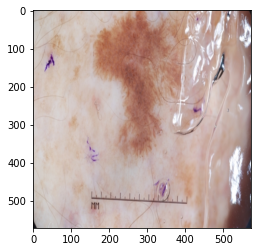

In [ ]:
plt.imshow(test_dataset[58][0].permute(1,2,0))

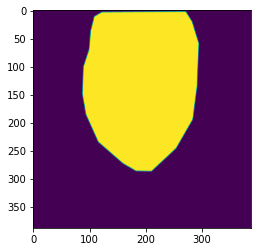

In [ ]:
plt.imshow(test_dataset[58][1][0])

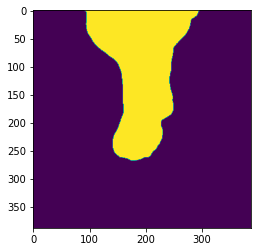

In [ ]:
plt.imshow(out[0][0]>=0.5)

In [ ]:
compute_iou(test_dataset[10][1][0]>=0.5,out[0][0]>=0.5)

0.5758615320842213

In [ ]:
test_losses = []
test_loss = 0.0
test_ious = []
test_iou = 0.0
for i, data in enumerate(test_dataloader):
            x, y_true = data
            x, y_true = x.to(device), y_true.to(device)
            
            with torch.no_grad():
                y_pred = unet(x)
                loss = iou_loss(y_pred, y_true)
                test_losses.append(loss.item())
                test_ious.append(compute_iou(y_pred.cpu()>=0.5,y_true.cpu()>=0.5))

test_loss = np.mean(test_losses)
test_iou = np.mean(test_ious)
print(test_loss)
print(test_iou)

0.5917617877324423
0.6089366274663401
